In [1]:
import json
import numpy as np
import itertools
from collections import OrderedDict
from math import comb
import os
import pickle

In [2]:
def _flatten_S_dict(S_dict):
    # S_dict is dictionary, NOT a list of dictionaries
    flatten_S = []
    stages = len(S_dict)
    for k in range(stages):
        flatten_S.append(S_dict[k])
    return np.hstack(flatten_S)

# seq 1 : Flattened array
# seq 2 : Flattened array
# shape : shape of the biomarker clusters
# penalty : penalty term, set to 0.5 as default

def pair_scores(seq1, seq2, shape, penalty=0.5):
    assert set(seq1) == set(seq2)
    N_b = seq1.shape[0]
    seq1_pos = np.zeros(N_b)
    seq2_pos = np.zeros(N_b)
    seq1_pos[seq1] = [i for i, j in enumerate(shape) for _ in range(j)]
    seq2_pos[seq2] = [i for i, j in enumerate(shape) for _ in range(j)]
    pairs = list(itertools.combinations(seq1,2))
    kendall_tau = 0
    for i, j in pairs:
        rank_1i = seq1_pos[i]
        rank_1j = seq1_pos[j]
        rank_2i = seq2_pos[i]
        rank_2j = seq2_pos[j]
        sign1 = np.sign(rank_1j - rank_1i)
        sign2 = np.sign(rank_2j - rank_2i)
        sign_product = sign1*sign2
        sign_sum = sign1+sign2
        if sign_product != 0:
            if sign_product > 0:
                k = 0
            else:
                k = 1
        else:
            if sign_sum == 0:
                k = 0
            else:
                k = penalty
        # print((i, j), sign_product, sign_sum, k)
        kendall_tau += k
    return kendall_tau

In [24]:
samples = 600
dim = 100
N_S_gt = 2
N_max = 6
seeds = np.random.choice(N_max, N_S_gt, replace=False)
seeds.sort()
prob = [0.3, 0.7]
sim_data_root_path = "/home/rtandon32/ebm/ebm_experiments/output/jumbo_panel_fs.5/"
sub_paths = ["{}_sample/{}_dim/5_nclust/{}_seed/modified/hp.json".format(int(samples), int(dim), s) for s in seeds]

In [25]:
json_paths = []
data = {}
for e, p in enumerate(sub_paths):
    full_path = os.path.join(sim_data_root_path, p)
    with open(full_path) as f:
        hp = json.load(f)
    X = np.array(hp["X"])
    y = np.array(hp["y"])
    gt = np.array(hp["gt_order"])
    assert X.shape[0] == y.shape[0] == samples
    assert X.shape[1] == dim
    np.random.seed(seeds[e])
    idx = np.random.choice(samples, int(prob[e]*samples), replace=False)
    idx.sort()
    data[e] = (X[idx], y[idx], gt)
    

In [26]:
X_final = np.vstack([data[0][0], data[1][0]])
y_final = np.hstack([data[0][1], data[1][1]])

In [27]:
assert X_final.shape[0] == y_final.shape[0]
assert X_final.shape[1] == dim

In [28]:
pair_scores(data[0][2], data[1][2], [1]*dim)

2590

In [29]:
import sys
sys.path.insert(0, '/home2/rtandon32/ebm/s-SuStaIn/sim')

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cbook as cbook

import os

import pandas as pd

from simfuncs import *

from functools import partial, partialmethod
from kde_ebm.mixture_model import fit_all_gmm_models, fit_all_kde_models
from kde_ebm import plotting
from sSuStaIn.sEBMSustain import sEBMSustain

In [31]:
M, N = X_final.shape
BiomarkerNames = ['BM ' + str(i) for i in range(N)]
use_parallel_startpoints = True

# number of starting points
N_startpoints           = 50
# maximum number of inferred subtypes - note that this could differ from N_S_ground_truth
N_S_max                 = 2
N_iterations_MCMC_init = int(2e4)
N_iterations_MCMC       = int(2e4)
n_stages = 5
min_clust_size = 20
p_absorb = 0.4
rep = 10
stage_sizes = [dim // n_stages] * n_stages
SuStaInLabels = BiomarkerNames
mixtures = fit_all_gmm_models(X_final, y_final)
dataset_name            = 'simulations_2'
output_dir              = '/home/rtandon32/ebm/s-SuStain-outputs'
output_folder           = os.path.join(output_dir, dataset_name)
if not os.path.isdir(output_folder):
    os.mkdir(output_folder)
use_parallel_startpoints = True

In [32]:
L_yes                   = np.zeros(X_final.shape)
L_no                    = np.zeros(X_final.shape)
for i in range(N):
    L_no[:, i], L_yes[:, i] = mixtures[i].pdf(None, X_final[:, i])

In [33]:
sustain = sEBMSustain(L_yes, L_no, n_stages, stage_sizes, min_clust_size, p_absorb, rep, SuStaInLabels, N_startpoints, N_S_max, N_iterations_MCMC_init, N_iterations_MCMC, output_folder, dataset_name, use_parallel_startpoints)

Failed to find pickle file: /home/rtandon32/ebm/s-SuStain-outputs/simulations_2/pickle_files/simulations_2_subtype0.pickle. Running SuStaIn model for 0 subtype.
Finding ML solution to 1 cluster problem
Overall ML likelihood is -133633.1736387086


MCMC Iteration:   0%|          | 0/20000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/20000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/20000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/20000 [00:00<?, ?it/s]

Failed to find pickle file: /home/rtandon32/ebm/s-SuStain-outputs/simulations_2/pickle_files/simulations_2_subtype1.pickle. Running SuStaIn model for 1 subtype.
Splitting cluster 1 of 1
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is -130516.8226156369
Overall ML likelihood is -130516.8226156369


MCMC Iteration:   0%|          | 0/20000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/20000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/20000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/20000 [00:00<?, ?it/s]

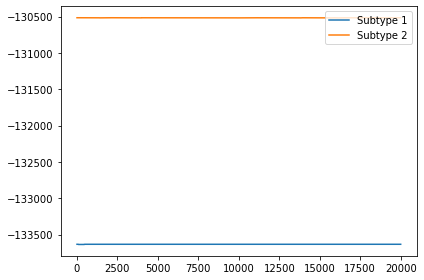

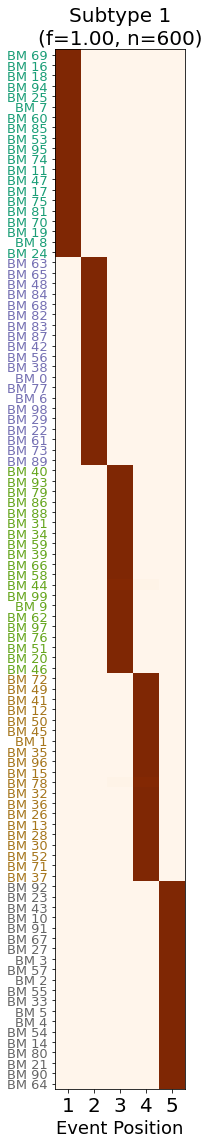

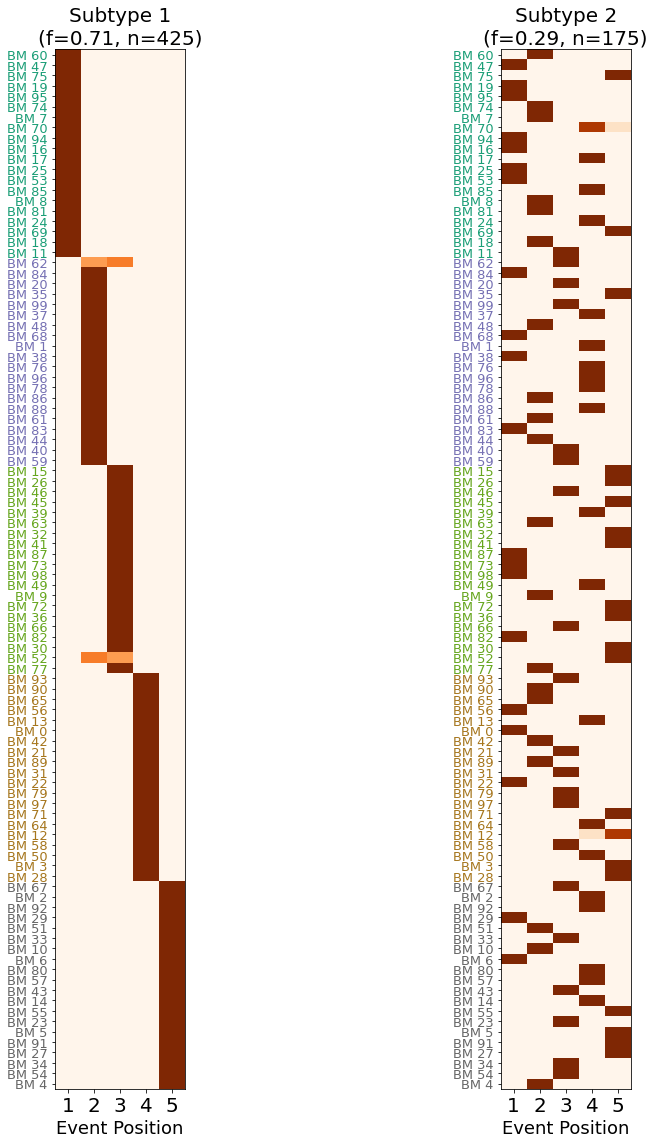

In [34]:
samples_sequence, samples_f, ml_subtype, prob_ml_subtype, ml_stage, prob_ml_stage, prob_subtype_stage = sustain.run_sustain_algorithm(plot=True)

In [35]:

samples_sequence.shape

(2, 100, 20000)

In [78]:
pkl_path = "/home/rtandon32/ebm/s-SuStain-outputs/simulations_3_mixture_GMM/pickle_files/simulations_3_subtype2.pickle"
with open(pkl_path, "rb") as input_file:
    pkl = pickle.load(input_file)

In [79]:
shape = pkl["shape_seq"]

In [53]:
for i in range(shape.shape[0]):
    for j in range(2):
        d = pair_scores(samples_sequence[:,:,-1][i].astype(int), data[j][2], shape[i])
        print(i, j, d/comb(N, 2))

0 0 0.5137373737373737
0 1 0.36383838383838385
1 0 0.4696969696969697
1 1 0.4795959595959596


In [48]:
shape[i]

array([20, 20, 40, 49, 71])

In [71]:
N                       = 100         # number of biomarkers
M                       = 200       # number of observations ( e.g. subjects )
N_S_ground_truth        = 3         # number of ground truth subtypes
# the fractions of the total number of subjects (M) belonging to each subtype
ground_truth_fractions = np.array([0.6, 0.30, 0.10])

#create some generic biomarker names
BiomarkerNames           = ['BM ' + str(i) for i in range(N)]

#***************** parameters for SuStaIn-based inference of subtypes
use_parallel_startpoints = True

# number of starting points
N_startpoints           = 25
# maximum number of inferred subtypes - note that this could differ from N_S_ground_truth
N_S_max                 = 3
N_iterations_MCMC       = int(1e4)  #Generally recommend either 1e5 or 1e6 (the latter may be slow though) in practice

#labels for plotting are biomarker names
SuStaInLabels           = BiomarkerNames

# cross-validation
validate                = True
N_folds                 = 3         #Set low to speed things up here, but generally recommend 10 in practice

#either 'mixture_GMM' or 'mixture_KDE' or 'zscore'
sustainType             = 'mixture_GMM'


dataset_name            = 'simulations_3'
output_dir              = '/home/rtandon32/ebm/s-SuStain-outputs'
output_folder           = os.path.join(output_dir, dataset_name + '_' + sustainType)
if not os.path.isdir(output_folder):
    os.mkdir(output_folder)

ground_truth_subj_ids   = list(np.arange(1, M+1).astype('str'))
ground_truth_sequences  = generate_random_mixture_sustain_model(N, N_S_ground_truth)

ground_truth_subtypes   = np.random.choice(range(N_S_ground_truth), M, replace=True, p=ground_truth_fractions).astype(int)

N_stages                = N

ground_truth_stages_control = np.zeros((int(np.round(M * 0.25)), 1))
ground_truth_stages_other   = np.random.randint(1, N_stages+1, (int(np.round(M * 0.75)), 1))
ground_truth_stages         = np.vstack((ground_truth_stages_control, ground_truth_stages_other)).astype(int)

data, data_denoised     = generate_data_mixture_sustain(ground_truth_subtypes, ground_truth_stages, ground_truth_sequences, sustainType)

# choose which subjects will be cases and which will be controls
MIN_CASE_STAGE          = np.round((N + 1) * 0.8)
index_case              = np.where(ground_truth_stages >=  MIN_CASE_STAGE)[0]
index_control           = np.where(ground_truth_stages ==  0)[0]

labels                  = 2 * np.ones(data.shape[0], dtype=int)     # 2 - intermediate value, not used in mixture model fitting
labels[index_case]      = 1                                         # 1 - cases
labels[index_control]   = 0                                         # 0 - controls

data_case_control       = data[labels != 2, :]
labels_case_control     = labels[labels != 2]

if sustainType == "mixture_GMM":
    mixtures            = fit_all_gmm_models(data, labels)
elif sustainType == "mixture_KDE":
    mixtures            = fit_all_kde_models(data, labels)

/home/rtandon32/.conda/envs/sustain/lib/python3.9/site-packages/scipy/optimize/optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


In [72]:
L_yes                   = np.zeros(data.shape)
L_no                    = np.zeros(data.shape)
for i in range(N):
    if sustainType == "mixture_GMM":
        L_no[:, i], L_yes[:, i] = mixtures[i].pdf(None, data[:, i])
    elif sustainType   == "mixture_KDE":
        L_no[:, i], L_yes[:, i] = mixtures[i].pdf(data[:, i].reshape(-1, 1))

In [74]:
rep=10
N_iterations_MCMC_init=1e4
n_stages = 5
min_clust_size = 3
p_absorb = 0.3
N_iterations_MCMC       = int(1e5)  #Generally recommend either 1e5 or 1e6 (the latter may be slow though) in practice
stage_sizes = [N // n_stages]*n_stages

In [75]:
sustain = sEBMSustain(L_yes, L_no, n_stages, stage_sizes, min_clust_size, p_absorb, rep, SuStaInLabels, N_startpoints, N_S_max, N_iterations_MCMC_init,N_iterations_MCMC, output_folder, dataset_name, use_parallel_startpoints)

Failed to find pickle file: /home/rtandon32/ebm/s-SuStain-outputs/simulations_3_mixture_GMM/pickle_files/simulations_3_subtype0.pickle. Running SuStaIn model for 0 subtype.
Finding ML solution to 1 cluster problem
Overall ML likelihood is -81817.47174204048


MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/100000 [00:00<?, ?it/s]

/home2/rtandon32/ebm/s-SuStaIn/sSuStaIn/sEBMSustain.py:507: UserWarning: Both labels and an order have been given. The labels will be reordered according to the given order!
  warnings.warn(


Failed to find pickle file: /home/rtandon32/ebm/s-SuStain-outputs/simulations_3_mixture_GMM/pickle_files/simulations_3_subtype1.pickle. Running SuStaIn model for 1 subtype.
Splitting cluster 1 of 1
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is -59238.062505021175
Overall ML likelihood is -59238.062505021175


MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/100000 [00:00<?, ?it/s]

Failed to find pickle file: /home/rtandon32/ebm/s-SuStain-outputs/simulations_3_mixture_GMM/pickle_files/simulations_3_subtype2.pickle. Running SuStaIn model for 2 subtype.
Splitting cluster 1 of 2
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is -54179.236629407045
Splitting cluster 2 of 2
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is -52619.82143106397
Overall ML likelihood is -52619.82143106397


MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/100000 [00:00<?, ?it/s]

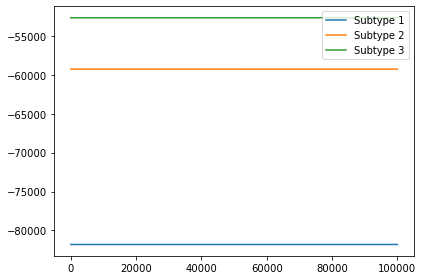

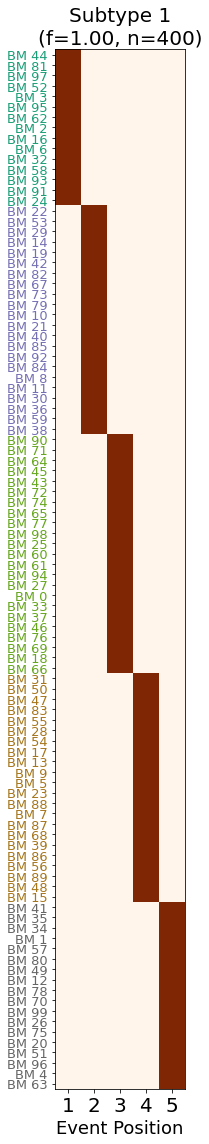

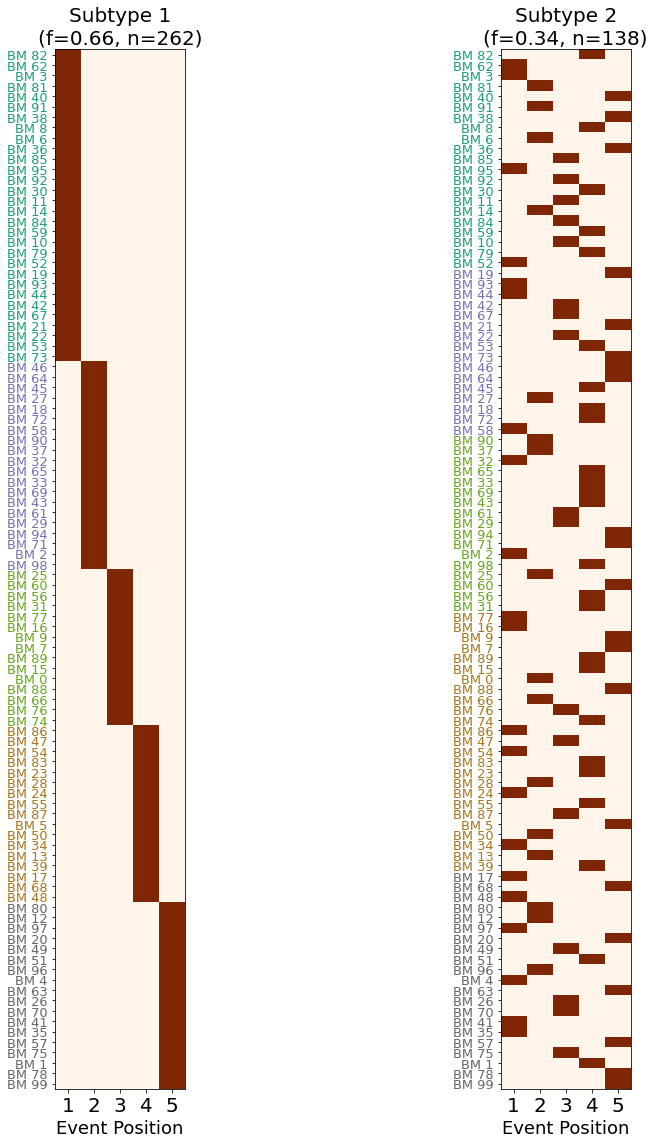

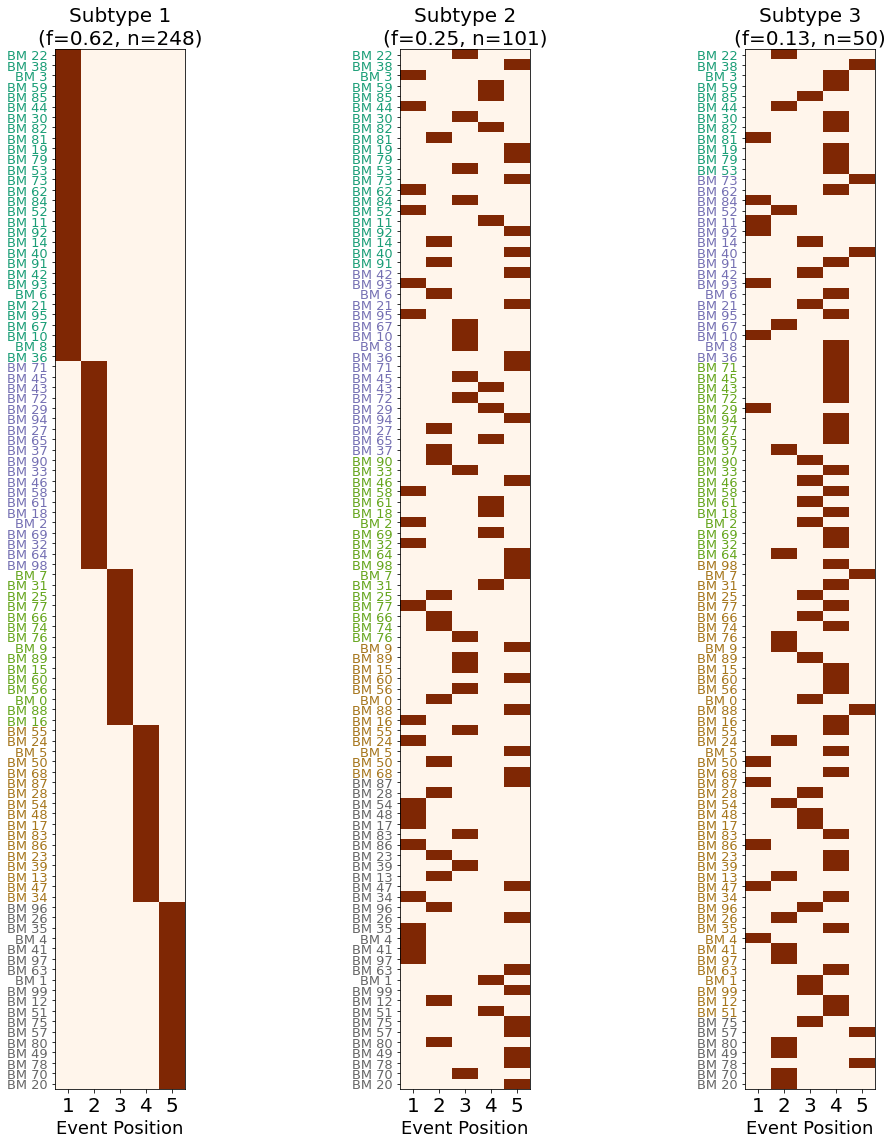

In [76]:
samples_sequence, samples_f, ml_subtype, prob_ml_subtype, ml_stage, prob_ml_stage, prob_subtype_stage = sustain.run_sustain_algorithm(plot=True)

In [81]:
ground_truth_sequences

array([[67., 95., 92., 73., 40., 53., 30., 82., 11., 62., 81., 36., 93.,
         3.,  8., 85., 10., 84., 21., 42., 44., 59., 19., 14., 91., 79.,
        52., 38.,  6., 22., 29., 58., 32., 18., 43., 69., 27., 94., 72.,
        65., 46., 61., 33., 64., 71.,  2., 45., 98., 90., 77., 37., 74.,
        76., 16.,  9., 66., 25., 60.,  0., 31., 56., 15., 89., 88.,  7.,
        68., 83., 54., 23., 55., 87., 48., 13., 17.,  5., 50., 39., 47.,
        28., 86., 34., 24., 57., 51., 12., 78., 49., 99., 41., 96., 70.,
        35., 26.,  4., 75., 63., 97., 20.,  1., 80.],
       [95., 62., 32., 41., 44., 54., 16., 35., 86.,  3.,  2., 93., 17.,
        58., 77., 97.,  4., 34., 52., 24., 48., 12., 81., 96., 80., 66.,
        25., 91., 27.,  6., 37., 14., 74., 23., 28., 90., 13., 83., 50.,
        56., 15.,  0., 45., 67., 53., 76., 33., 55., 30., 72., 39., 70.,
        89., 84.,  8., 22., 10., 65., 29., 43., 61., 69., 11., 82., 51.,
        31., 59., 85., 75.,  1., 42., 18., 98., 36., 79., 92.,  5., 47

In [87]:
for i in range(shape.shape[0]):
    for j in range(3):
        d = pair_scores(samples_sequence[:,:,-1][i].astype(int), ground_truth_sequences[j].astype(int), shape[i])
        print(i, j, d/comb(N, 2))

0 0 0.006868686868686869
0 1 0.48505050505050507
0 2 0.5325252525252525
1 0 0.48787878787878786
1 1 0.015555555555555555
1 2 0.4448484848484848
2 0 0.4993939393939394
2 1 0.39636363636363636
2 2 0.10565656565656566


In [86]:
samples_sequence[:,:,-1][i].astype(int)

array([53, 30, 85, 59, 14, 82, 67, 93, 62, 92, 19, 36, 22,  8, 52, 10, 91,
       40,  3, 44, 38, 84, 42, 73, 81,  6, 11, 21, 95, 79, 45, 64, 94, 69,
       98, 65, 33, 18, 61, 43, 27, 37, 29, 58, 46, 72, 71, 90, 32,  2, 16,
       77, 76, 74, 66, 25, 56, 60,  7,  9, 89,  0, 31, 88, 15, 83, 68, 17,
       87, 28, 39, 86, 23, 54, 48, 34, 50, 55, 47, 13,  5, 24, 26, 57, 41,
       20,  4, 80, 99, 35, 97, 70, 51, 78,  1, 75, 63, 12, 49, 96])

In [85]:
shape[i]

array([30, 20, 15, 17, 18])